In [1367]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
from matplotlib import colors as mcolors
from scipy import stats


Load Dataset and check datatypes

In [1368]:
df = pd.read_csv("FRS_2023-12-14T1607.csv")
##  Shorten col names
df.rename(columns = {'ALSFRS Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'ALSFRS Data ALSFRS Entry Date':'Date'}, inplace = True)
df.rename(columns = {'ALSFRS Data Days Since Onset':'Onset'}, inplace = True)
df.rename(columns = {'ALSFRS Data Frs Climbing Stairs':'Stairs'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Cutting Food':'Cutting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dressing Hygiene':'Dressing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Dyspnea':'Dyspnea'}, inplace = True) ##Does not exist
df.rename(columns = {'ALSFRS Data FRS Handwriting':'Handwriting'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Orthopnea':'Ortho'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Respiratory Insufficiency':'Low_O2'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Salivation':'Saliva'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Speech':'Speech'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Swallowing':'Swallowing'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Turning in Bed':'Turning'}, inplace = True)
df.rename(columns = {'ALSFRS Data FRS Walking':'Walking'}, inplace = True)
df.rename(columns = {'ALSFRS Data Total Score':'Total'}, inplace = True)
df = df[['ID', 'Date', 'Onset','Stairs', 'Cutting', 'Dressing', 'Dyspnea', 'Handwriting', 'Ortho', 
         'Low_O2', 'Saliva', 'Speech', 'Swallowing', 'Turning', 'Walking', 'Total']]
df= df.sort_values(by=['ID'], ascending=True)  #Sort by ID
print(df.head())
print(df.dtypes) ## Show data types

         ID        Date   Onset  Stairs  Cutting  Dressing  Dyspnea  \
21178  47.0  2015-04-20  1450.0     2.0      4.0       3.0      4.0   
20449  47.0  2015-09-29  1612.0     0.0      4.0       3.0      4.0   
20906  47.0  2015-06-25  1516.0     2.0      4.0       3.0      4.0   
17379  47.0  2017-01-24  2095.0     0.0      1.0       1.0      4.0   
19864  47.0  2016-01-10  1715.0     0.0      4.0       2.0      4.0   

       Handwriting  Ortho  Low_O2  Saliva  Speech  Swallowing  Turning  \
21178          4.0    4.0     4.0     4.0     4.0         4.0      3.0   
20449          4.0    4.0     4.0     4.0     4.0         4.0      2.0   
20906          4.0    4.0     4.0     4.0     4.0         4.0      3.0   
17379          3.0    4.0     4.0     4.0     4.0         4.0      1.0   
19864          4.0    4.0     4.0     4.0     4.0         4.0      2.0   

       Walking  Total  
21178      2.0   42.0  
20449      2.0   39.0  
20906      2.0   42.0  
17379      0.0   30.0  
19864   

In [1369]:
df.describe()

,ID,Onset,Stairs,Cutting,Dressing,Dyspnea,Handwriting,Ortho,Low_O2,Saliva,Speech,Swallowing,Turning,Walking,Total
count,21566.000000,20458.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000,21566.000000
mean,898.798340,1996.151286,1.786933,2.309932,2.268385,3.143838,2.536817,3.445099,3.448020,3.188538,2.940833,3.162617,2.531438,2.251553,33.014004
std,591.090439,1686.058460,1.516123,1.411365,1.256277,1.158999,1.345976,0.922966,0.934419,1.048055,1.250504,1.171117,1.232307,1.174865,10.337015
min,47.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,384.000000,848.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,27.000000
50%,748.000000,1463.500000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,35.000000
75%,1404.000000,2572.750000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,41.000000
max,2155.000000,15208.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000


Text(0.5, 1.0, 'Mean FRS values')

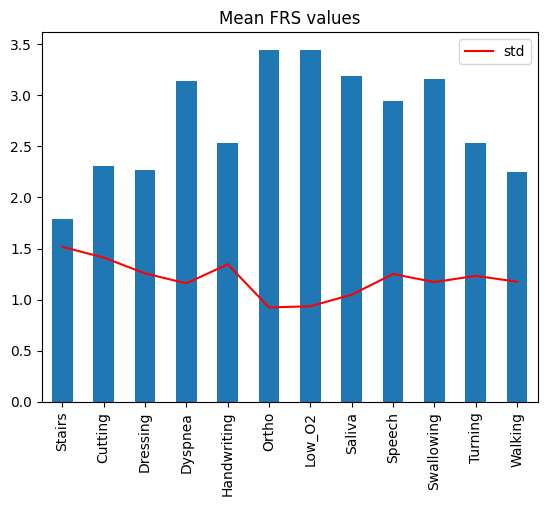

In [1370]:
dfreduced = df[['Stairs', 'Cutting', 'Dressing', 'Dyspnea', 'Handwriting', 'Ortho', 
         'Low_O2', 'Saliva', 'Speech', 'Swallowing', 'Turning', 'Walking']]  # Reduce df to FRS values only

dfreduced.mean().plot(kind='bar')  # mean FRS values as bars
dfreduced.std().plot(kind='line', color= 'red', label = 'std') # standard deviation as line
plt.legend()
plt.xticks(rotation=90)
plt.title('Mean FRS values')


Get stats

In [1371]:
dflast = df.sort_values('Onset').groupby('ID').tail(1)  # Get most recent values for each participant
dflast.describe()

,ID,Onset,Stairs,Cutting,Dressing,Dyspnea,Handwriting,Ortho,Low_O2,Saliva,Speech,Swallowing,Turning,Walking,Total
count,1280.000000,1187.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,1141.170312,1680.088458,1.508594,1.948438,1.935156,2.857813,2.260937,3.200781,3.262500,2.964062,2.617969,2.811719,2.171094,2.043750,29.582812
std,625.385670,1628.572637,1.548766,1.510608,1.396303,1.332848,1.460677,1.152690,1.095088,1.272291,1.443268,1.431147,1.399076,1.304815,12.198489
min,47.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,586.750000,668.500000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,20.000000
50%,1152.500000,1159.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,31.000000
75%,1692.500000,2129.500000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,40.000000
max,2155.000000,15208.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,48.000000


Histograms

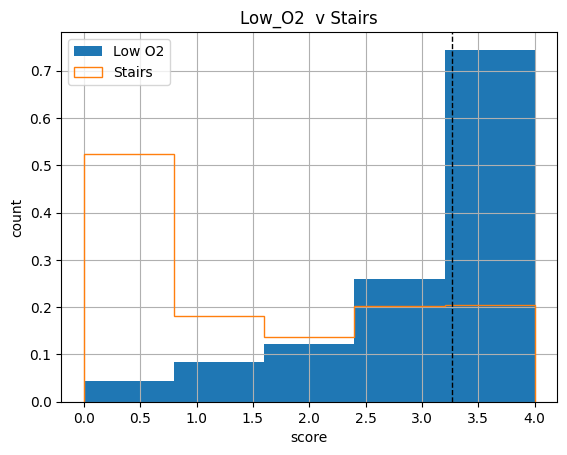

In [1372]:
dflast['Low_O2'].hist(bins = 5, density = 'True', label = 'Low O2')  # set bins to possible values
dflast['Stairs'].hist(bins = 5, density = 'True', histtype = 'step', label ='Stairs')  # density=true-values sum to 1.
plt.axvline(dflast['Low_O2'].mean(), color='k', linestyle='dashed', linewidth=1)  # Low O2 mean
plt.xlabel("score")
plt.ylabel("count")
plt.title('Low_O2  v Stairs')
plt.legend()
plt.show()

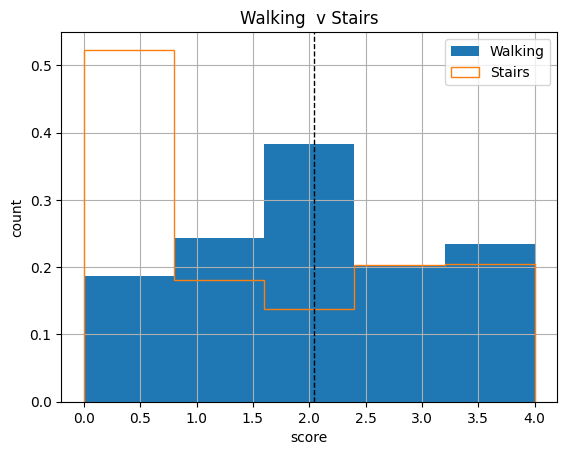

In [1373]:
dflast['Walking'].hist(bins = 5, density = 'True', label ='Walking')
dflast['Stairs'].hist(bins = 5, density = 'True', histtype = 'step', label ='Stairs')
plt.axvline(dflast['Walking'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("score")
plt.ylabel("count")
plt.title('Walking  v Stairs')
plt.legend()
plt.show()


Get moving average and regresssion line for a participant

-0.003563447799445254 39.99383594511772 -0.9677556543728524 1.0753994324181258e-64 9.051538491751568e-05


Text(0, 0.5, 'Total FRS Value')

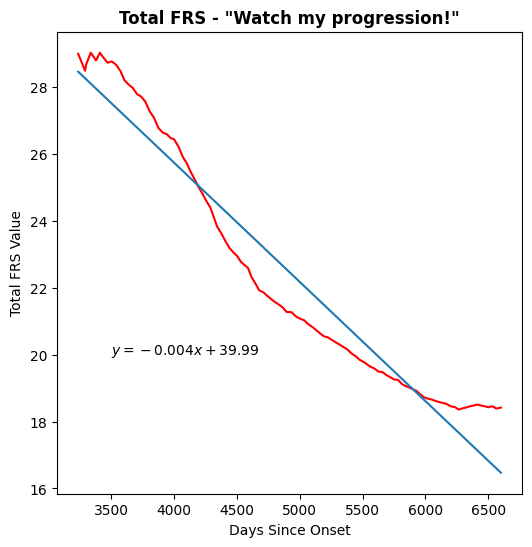

In [1374]:
df65= df.loc[df['ID'] == 49].sort_values(by=['Date'], ascending=True)  # Select a single participant 

# Get the moving averages of series
# of observations till the current time
moving_averages = round(df65['Total'].ewm(
  alpha=0.05, adjust=True).mean(), 2)  # alpha refect weight of actual to forecast
 
# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()

dfma = pd.DataFrame({'DSO': df65.Onset, 'Score': moving_averages_list })

fig, ax = plt.subplots(1,1, figsize = (6, 6))

ax.plot(dfma.DSO, dfma.Score, 'r')  # plot moving average
slope1, intercept, r, p, std = stats.linregress(dfma.DSO, dfma.Score)  # Use scipy for regression stats
print(slope1, intercept, r, p, std)
ax.plot(dfma.DSO, slope1*dfma.DSO +intercept) # plot regression line
ax.annotate(f'$y={slope1:.3f}x + {intercept:.2f}$', (3500,20))  # show equation on the graph
ax.title.set_text('Total FRS - "Watch my progression!"')
ax.title.set_weight('bold')
ax.set_xlabel('Days Since Onset')
ax.set_ylabel('Total FRS Value')


Show all FRS condition progregression for a participant

Stairs -0.00028222256147809334
Cutting -0.00048633468992110245
Dressing -0.00037394874922664744
Dyspnea -0.0005212531236082876
Handwriting -0.00013705050503553658
Ortho 0.0
Low_O2 0.00015582998534920123
Saliva -0.00035592641155043664
Speech -0.00016025093690786657
Swallowing -0.00044224204501594683
Turning -0.0002424098362442205
Walking -0.00033173344832271133


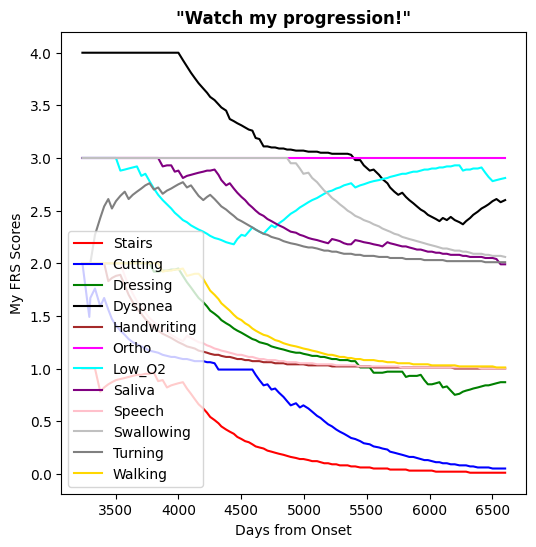

In [1375]:
condition = ['Stairs', 'Cutting', 'Dressing', 'Dyspnea', 'Handwriting', 'Ortho', 
         'Low_O2', 'Saliva', 'Speech', 'Swallowing', 'Turning', 'Walking']  # create array to itteerate
c = ['red', 'blue', 'green', 'black', 'brown', 'magenta', 'aqua', 'purple', # color for each condition
         'pink', 'silver', 'gray', 'gold']
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.title.set_text('"Watch my progression!"')
ax.title.set_weight('bold')
ax.set_xlabel('Days from Onset')
ax.set_ylabel('My FRS Scores')

###  Use same single participant in df65
for idx in range(len(condition)):  #loop through all the conditions
    moving_averages = round(df65[condition[idx]].ewm(
    alpha=0.05, adjust=True).mean(), 2)     # compute moving averages
    
    # Convert pandas series back to list
    moving_averages_list = moving_averages.tolist()
    dfma = pd.DataFrame({'Score': df65[condition[idx]], 'DSO': df65.Onset})

    slope, intercept, r, p, std = stats.linregress(dfma.DSO, dfma.Score)
    print(condition[idx], slope)
    # Plot each condition in a different color
    ax.plot(dfma.DSO, moving_averages_list, label = condition[idx], color = c[idx])
    ax.legend()


When does an FRS score begin to decline?

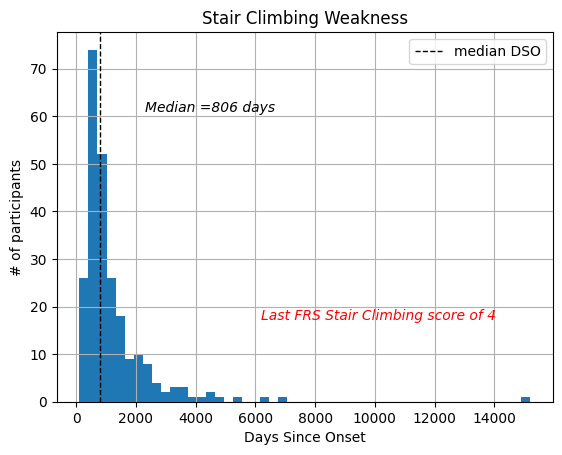

In [1376]:
df = df.sort_values(by=['ID'], ascending=True) ##  Sort by ID then Date
df = df.dropna() # drop rows with NaN values
dfstairs = df.loc[df['Stairs'] == 4]
dfstairs = dfstairs.groupby('ID').filter(lambda x : len(x)>1)  # Require at least two data points
dfstairs = dfstairs.groupby('ID').Onset.max()  # Select the maximum onset day 
# df.plot(marker='.', linestyle='none', title="First sign of Stair weakness")
dfstairs.hist(bins = 50)
plt.axvline(dfstairs.median(), color='k', linestyle='dashed', linewidth=1, label = 'median DSO')  # Low O2 mean
plt.xlabel("Days Since Onset")
plt.ylabel("# of participants")
plt.title('Stair Climbing Weakness')
plt.legend()
plt.text(.4, .15,  
         'Last FRS Stair Climbing score of 4',  
         style = 'italic', transform=ax.transAxes,
         fontsize = 10, 
         color = "red")
plt.text(.15, .6,  
         f'Median ={dfstairs.median():.0f} days',  
         style = 'italic', transform=ax.transAxes,
         fontsize = 10, 
         color = "black")
plt.show()
